New strat. 100 threads. Each thread must do 10 http calls. Thats it :-) Then we can do all the calls in the 5 minutes we have :o. 

Each 5 minutes the word is restarted, which is annoying >:(

New strategy. Send all request once and for the highest 24 send the second image to for a check

In [5]:
# Get all labels to print
import json

# return the wordnetsysnet
def get_all_labels_name():
    f = open(r"C:\Users\niels\Downloads\Reverse Captcha\labels.json")
  
    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    labels_to_get = []
    for i in range(0, 1000): # because 1000 records
        #print(data[i]['label'])
        labels_to_get.append(data[i]['label'])
    f.close()
    #print(labels_to_get)
    return labels_to_get

In [14]:
# create list of all image names per category (will be faster then calling os for each request)
import os

class ImageLocationItem:
    label: int
    location1: str
    location2: str
    location3: str
    location4: str
    location5: str

item_labels = get_all_labels_name()
image_location_list = []
for x in range(0, 1):
    item_name = item_labels[x]
    
    obj = ImageLocationItem()
    obj.label = item_name
    
    directory_in_str = "C:\ReversedCaptcha\hd-label-images\\" + item_name
    directory = os.fsencode(directory_in_str)
    
    currentIndex = 1
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
         
        if currentIndex == 1:
            obj.location1 = directory_in_str + "\\" + filename # + directory? check when first time debugging
        if currentIndex == 2:
            obj.location2 = directory_in_str + "\\" + filename # + directory? check when first time debugging
        if currentIndex == 3:
            obj.location3 = directory_in_str + "\\" + filename # + directory? check when first time debugging
        if currentIndex == 4:
            obj.location4 = directory_in_str + "\\" + filename # + directory? check when first time debugging
        if currentIndex == 5:
            obj.location5 = directory_in_str + "\\" + filename # + directory? check when first time debugging
        
        if currentIndex == 6:
            break
        
        currentIndex += 1
    image_location_list.append(obj)

print(image_location_list[0].location3)
    


C:\ReversedCaptcha\hd-label-images\tench\tench4.jpg


# Checking in how much time the captcha changes

# code for changing captcha check
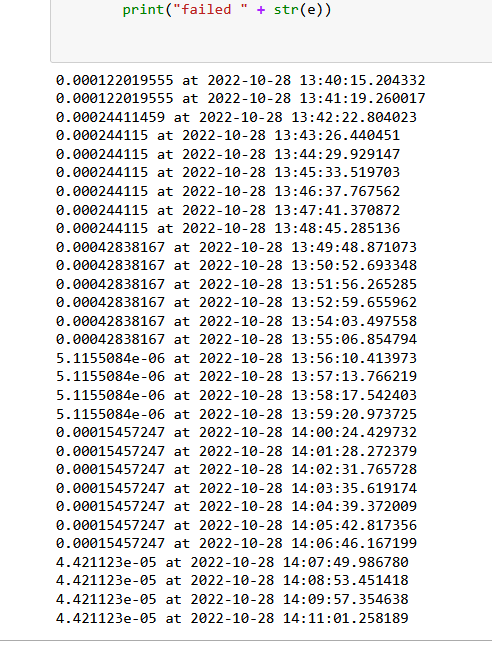

In [1]:
import requests
import time
from datetime import datetime

def send_static_request_with_same_image_always():
    # Prepare request to send for index
    label = "n09193705"
    image_path = "C:\ReversedCaptcha\Images\itemname\itemname1.jpg".replace("itemname", label)
    real_url = 'https://europe-west1-coding-challenge-platform.cloudfunctions.net/ctf-reverse-captcha-5736741495373824'
    
    # Open image to send along
    with open(image_path, "rb") as file:
        files = {'file': file}
        
        # Send the request
        response = requests.post(real_url, headers={"Authorization":"{5736741495373824}"}, files=files)
        #print(response.json())
        
        # Do something with the response
        json_response = response.json()
        json_response['label'] = label # add the label to the response data so we can look it up later
    return json_response

results = []
for x in range(0, 30):
    try:
        result = send_static_request_with_same_image_always()
        now = datetime.now()
        info = result['result'] + " at " + str(now)
        results.append(info)
        print(info)
        time.sleep(60) # do every 1 minute
    except Exception as e:
        print("failed " + str(e))
    


3.487251e-05 at 2022-10-29 11:58:33.319148
3.487251e-05 at 2022-10-29 11:59:36.748371
0.00013560258 at 2022-10-29 12:00:39.839736


KeyboardInterrupt: 

In [ ]:
# Code for retrieving a list of all labels (1000 labels)

In [ ]:
# Get all labels to print
import json

# return the wordnetsysnet
def get_all_labels_name():
    f = open(r"C:\Users\niels\Downloads\Reverse Captcha\labels.json")
  
    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    labels_to_get = []
    for i in range(0, 1000): # because 1000 records
        #print(data[i]['label'])
        labels_to_get.append(data[i]['label'])
    f.close()
    #print(labels_to_get)
    return labels_to_get

# return the wordnetsysnet
def get_all_labels_wordnetsysnet():
    f = open(r"C:\Users\niels\Downloads\Reverse Captcha\labels.json")
  
    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    labels_to_get = []
    for i in range(0, 1000): # because 1000 records
        #print(data[i]['label'])
        labels_to_get.append(data[i]['wordnetSynset'])
    f.close()
    #print(labels_to_get)
    return labels_to_get

# Code for sending 1 request per label (1000 labels total)

In [ ]:
import requests
import concurrent
from concurrent.futures import ThreadPoolExecutor

result_list = []

labels = get_all_labels_name()
loops = range(0, 1000)

test_url = 'http://localhost:3000/users'
real_url = 'https://europe-west1-coding-challenge-platform.cloudfunctions.net/ctf-reverse-captcha-5736741495373824'
threads = 24

failed_labels = []
failed_indexes = []
def get_label_info(index):
    # Prepare request to send for index
    label = labels[index]
    #image_path = "C:\ReversedCaptcha\Images\itemname\itemname1.jpg".replace("itemname", label) # non HD images
    image_path = "C:\ReversedCaptcha\HD-Images-label-name\itemname\itemname.jpg".replace("itemname", label) # non HD images
    
    # Open image to send along
    with open(image_path, "rb") as file:
        files = {'file': file}
        
        # Send the request
        response = requests.post(real_url, headers={"Authorization":"{5736741495373824}"}, files=files)
        json_response = response.json()
        #print(json_response)

        if response.status_code == 200:
            print("Successfully retrieved label " + label + " with score " + json_response["result"])
        else:
            failed_labels.append(label)
            failed_indexes.append(index)
            print("Something went wrong for label " + label)
        
        # Do something with the response
        json_response['label'] = label # add the label to the response data so we can look it up later
        
        
    return json_response

with ThreadPoolExecutor(max_workers=threads) as executor:
    future_to_url = {executor.submit(get_label_info, char) for char in loops}
    
    for future in concurrent.futures.as_completed(future_to_url):
        try:
            data = future.result()
            #print(data)
            result_list.append(data)
            #print(data['status'])
            #print(data['result'])
        except Exception as e:
            print("Something went wrong " + str(e))

# Code for sorting the result of all sends  and print the top 50 highest

In [2]:
# sort result list
print("total: " +  str(len(result_list)))

result_list.sort(key=lambda x: x["result"])
result_list.reverse()

# print top 10 from the bottom (sort does sort )
for i in range(0, 50):
    print(result_list[i])


NameError: name 'result_list' is not defined

# Code for guessing the word

In [9]:
import requests

def guess_answer(label, wordnet):
    url = "https://europe-west1-coding-challenge-platform.cloudfunctions.net/ctf-reverse-captcha-5736741495373824/answer"
    r = requests.post(url, headers={"Authorization":"{5736741495373824}"}, json={"label": label, "wordnetSynset": wordnet})

    print(r.status_code)
    print(r.content)
    return r
    
guess_answer("traffic_light", "n06874185")

500
b'Error: could not handle the request\n'


<Response [500]>